## Observations and Insights
Type Markdown and LaTeX:  𝛼2

In this Dataset we studied 250 mice and identified with SCC tumor growth were treated through a variety of drug regimens. The we compared the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. We found the following insights. 

1) There are almost same amout of male mice versus female mice. Male mice has barely edge over female mice.

2)The corelation cooficient between weight and tumor growth is 0.95, so tumor growth has strong positive corelation with weight. 

3)With the effects of the drugs most of the mice's tumor growth goes down, some of may not even survive for till 45 days.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "../Resources/Mouse_metadata.csv"
study_results = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [6]:
regimen_sorted = combined_data.sort_values('Tumor Volume (mm3)')
regimen_sorted.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [7]:
regimen_summary = regimen_sorted.groupby("Drug Regimen")


In [8]:
mean = regimen_summary['Tumor Volume (mm3)'].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
median = regimen_summary['Tumor Volume (mm3)'].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
variance = regimen_summary['Tumor Volume (mm3)'].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
std_deviation = regimen_summary['Tumor Volume (mm3)'].std()
std_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
sem = regimen_summary['Tumor Volume (mm3)'].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
summary_table = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Std_deviation":std_deviation, "SEM":sem})
summary_table

,Mean,Median,Variance,Std_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [15]:
height = summary_table[['Mean', 'Median', 'Variance', 'Std_deviation', 'SEM']]
height

,Mean,Median,Variance,Std_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
total_mouse_count = combined_data['Drug Regimen'].value_counts()
total_mouse_count 

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

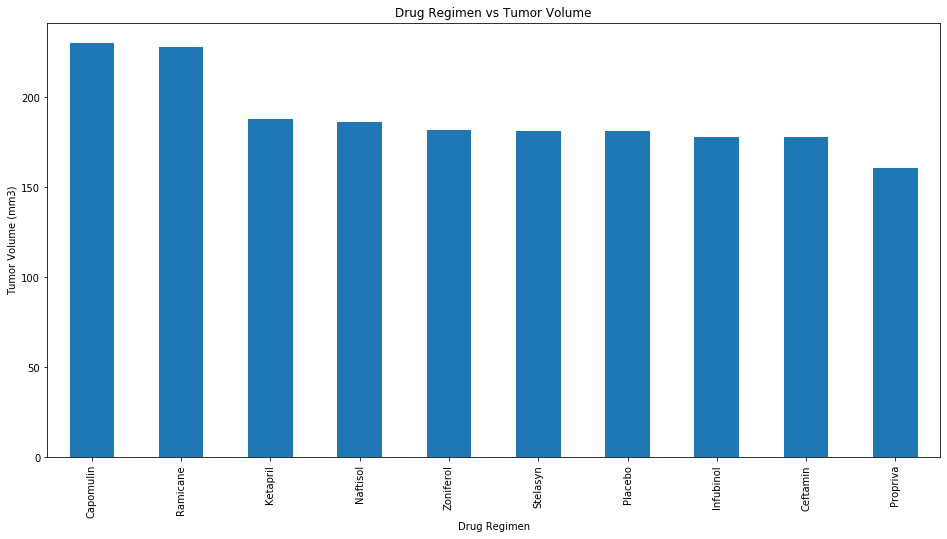

In [17]:
chart_1 = total_mouse_count.plot(kind='bar', figsize=(16,8))
chart_1.set_xlabel('Drug Regimen')
chart_1.set_ylabel('Tumor Volume (mm3)')
chart_1.set_title('Drug Regimen vs Tumor Volume')
plt.show()

In [18]:
drug_regimen_grouped = regimen_sorted.groupby('Drug Regimen')
mouse_count = drug_regimen_grouped['Tumor Volume (mm3)'].count()
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [19]:
mouse_count_df = pd.DataFrame(mouse_count)
sorted_df = mouse_count_df.sort_values('Tumor Volume (mm3)', ascending=False)


In [20]:
x = sorted_df.index
x

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object', name='Drug Regimen')

In [21]:
y = sorted_df['Tumor Volume (mm3)']
y

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Tumor Volume (mm3), dtype: int64

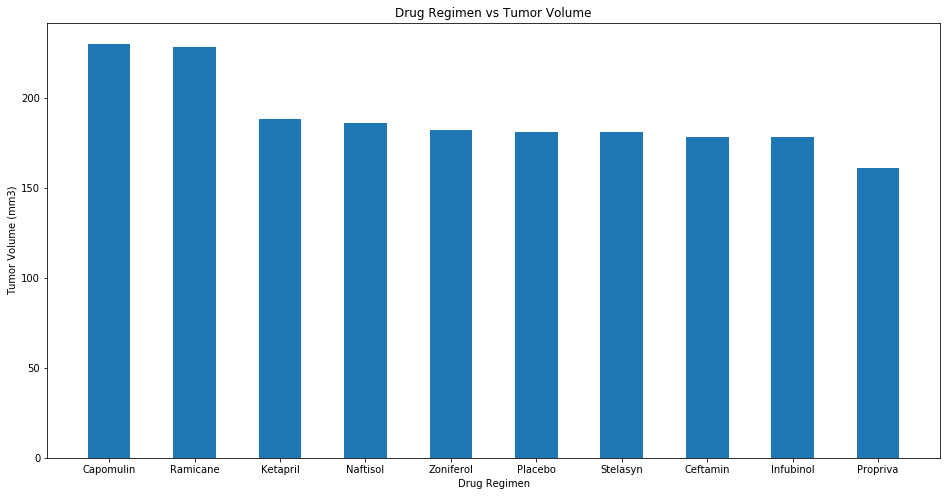

In [23]:
plt.bar(x, y, width=0.5)
plt.rcParams['figure.figsize']=(16,8)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Drug Regimen vs Tumor Volume')
plt.show()

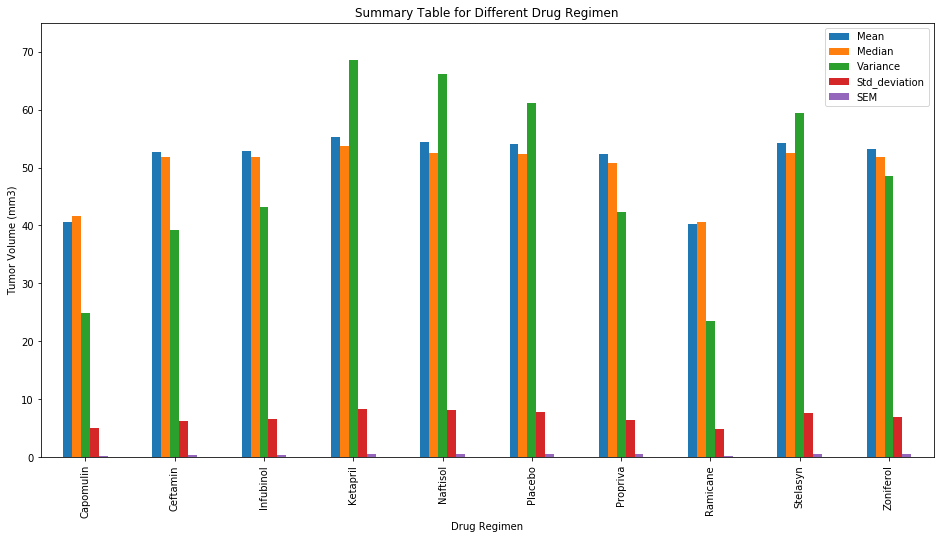

In [24]:
# ---------------------------Extra chart----------------
chart_1 = summary_table.plot(kind='bar', figsize=(16,8))
chart_1.set_ylabel('Tumor Volume (mm3)')
chart_1.set_title('Summary Table for Different Drug Regimen')
chart_1.set_ylim(0,75)
chart_1


## Pie plots

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [26]:
labels = combined_data['Sex']
labels

0       Male
1       Male
2       Male
3       Male
4       Male
        ... 
1888    Male
1889    Male
1890    Male
1891    Male
1892    Male
Name: Sex, Length: 1893, dtype: object

In [27]:
count = labels.count()
count

1893

In [28]:
gender_group = combined_data.groupby('Sex')

In [29]:
count = gender_group['Sex'].count()
count

Sex
Female    935
Male      958
Name: Sex, dtype: int64

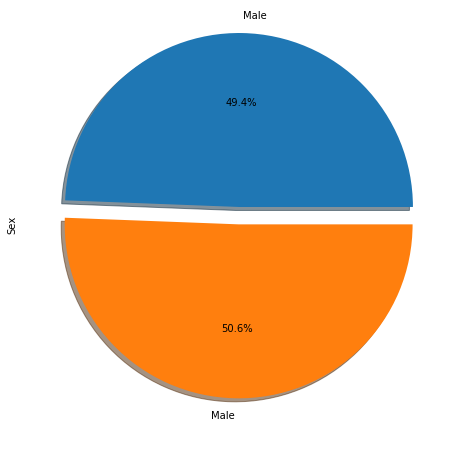

In [30]:
explode=(0.1,0)
pie_chart = count.plot(kind='pie', labels=labels, autopct="%1.1f%%",shadow=True, explode=explode)

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

(-1.1046567928362272,
 1.1022210380848285,
 -1.1077121695699783,
 1.2101537272442933)

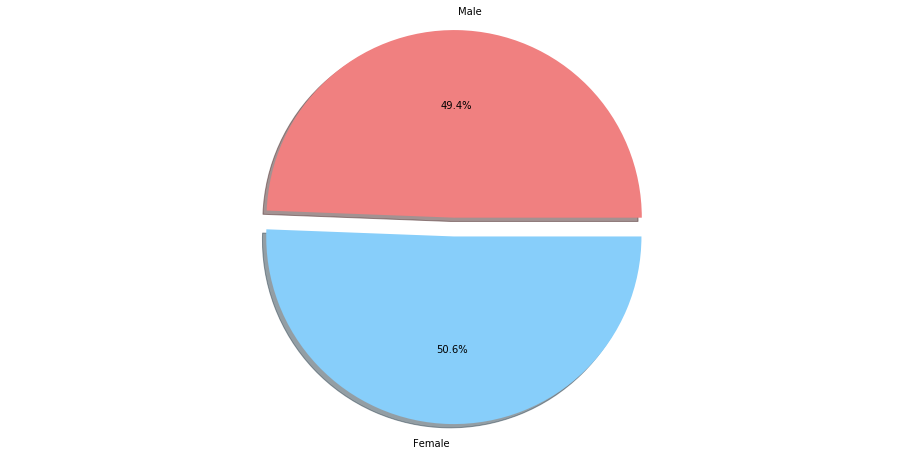

In [32]:
labels=['Male', 'Female']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1,0)
plt.pie(count, explode=explode, colors=colors, shadow=True, labels=labels, autopct="%1.1f%%")
plt.axis('equal')

## Quartiles, outliers and boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [34]:
tumor_volume = combined_data[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]
tumor_volume

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
0,Ramicane,k403,45.000000,0
1,Ramicane,k403,38.825898,5
2,Ramicane,k403,35.014271,10
3,Ramicane,k403,34.223992,15
4,Ramicane,k403,32.997729,20
...,...,...,...,...
1888,Naftisol,z969,63.145652,25
1889,Naftisol,z969,65.841013,30
1890,Naftisol,z969,69.176246,35
1891,Naftisol,z969,70.314904,40


In [35]:
drug_df = tumor_volume.set_index('Drug Regimen')
drug_df.head()

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Ramicane,k403,45.000000,0
Ramicane,k403,38.825898,5
Ramicane,k403,35.014271,10
Ramicane,k403,34.223992,15
Ramicane,k403,32.997729,20


In [36]:
tumor_response = tumor_volume.loc[(tumor_volume["Drug Regimen"]=='Capomulin')|
                                 (tumor_volume["Drug Regimen"] == 'Ramicane')|
                                 (tumor_volume["Drug Regimen"] == 'Infubinol')|
                                 (tumor_volume["Drug Regimen"] == 'Ceftamin')]
tumor_response

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
0,Ramicane,k403,45.000000,0
1,Ramicane,k403,38.825898,5
2,Ramicane,k403,35.014271,10
3,Ramicane,k403,34.223992,15
4,Ramicane,k403,32.997729,20
...,...,...,...,...
1868,Infubinol,z581,54.316407,25
1869,Infubinol,z581,56.286750,30
1870,Infubinol,z581,58.628399,35
1871,Infubinol,z581,60.053740,40


In [37]:
tumor_response_sorted = tumor_response.sort_values('Timepoint',ascending=False)
tumor_response_sorted

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
1872,Infubinol,z581,62.754451,45
800,Infubinol,e476,62.435404,45
154,Ramicane,c758,33.397653,45
440,Capomulin,i557,47.685963,45
144,Capomulin,m957,33.329098,45
...,...,...,...,...
75,Ramicane,z578,45.000000,0
1113,Ceftamin,l490,45.000000,0
1120,Ceftamin,l558,45.000000,0
1123,Ceftamin,l661,45.000000,0


In [38]:
tumor_response_grouped = tumor_response_sorted.groupby(['Drug Regimen', 'Mouse ID'])
tumor_response_grouped.head(5)

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
1872,Infubinol,z581,62.754451,45
800,Infubinol,e476,62.435404,45
154,Ramicane,c758,33.397653,45
440,Capomulin,i557,47.685963,45
144,Capomulin,m957,33.329098,45
...,...,...,...,...
1615,Infubinol,v339,45.000000,0
1204,Infubinol,m756,45.000000,0
837,Ceftamin,f436,45.000000,0
939,Ceftamin,h531,45.000000,0


In [39]:
final_tumor_volume = tumor_response_grouped.first()
final_tumor_volume

Tumor Volume (mm3)  Timepoint
Drug Regimen Mouse ID                               
Capomulin    b128               38.982878         45
             b742               38.939633         45
             f966               30.485985         20
             g288               37.074024         45
             g316               40.159220         45
...                                   ...        ...
Ramicane     s508               30.276232         45
             u196               40.667713         45
             w678               43.166373          5
             y449               44.183451         15
             z578               30.638696         45

[100 rows x 2 columns]

In [43]:
capomulin_mouse = final_tumor_volume.loc[("Capomulin"),["Tumor Volume (mm3)"]]
capomulin_mouse
capomulin_mouse.sort_values('Tumor Volume (mm3)')
median = capomulin_mouse.median()
q1 = np.percentile(capomulin_mouse,25)
q3 = np.percentile(capomulin_mouse,75)
iqr = q3-q1
upper_bound_cap = q3 + (1.5*iqr)
lower_bound_cap = q1 - (1.5*iqr)
print(f"Median : {median}")
print(f"Q1 : {q1}")
print(f"Q3 : {q3}")
print(f"IQR : {iqr}")
print(f"Upper Bound : {upper_bound_cap}")
print(f"Lower Bound : {lower_bound_cap}")
outliers = capomulin_mouse[(capomulin_mouse['Tumor Volume (mm3)']<lower_bound_cap) | (capomulin_mouse['Tumor Volume (mm3)']>upper_bound_cap)]
print(f"Outliers : {outliers}")

Median : Tumor Volume (mm3)    38.125164
dtype: float64
Q1 : 32.37735684
Q3 : 40.1592203
IQR : 7.781863460000004
Upper Bound : 51.83201549
Lower Bound : 20.70456164999999
Outliers : Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


In [46]:
ramicane_mouse = final_tumor_volume.loc[("Ramicane"),["Tumor Volume (mm3)"]]
ramicane_mouse.sort_values('Tumor Volume (mm3)')
median = ramicane_mouse.median()
q1 = np.percentile(ramicane_mouse,25)
q3 = np.percentile(ramicane_mouse,75)
iqr = q3-q1
upper_bound_cap = q3 + (1.5*iqr)
lower_bound_cap = q1 - (1.5*iqr)
print(f"Median : {median}")
print(f"Q1 : {q1}")
print(f"Q3 : {q3}")
print(f"IQR : {iqr}")
print(f"Upper Bound : {upper_bound_cap}")
print(f"Lower Bound : {lower_bound_cap}")
outliers = ramicane_mouse[(ramicane_mouse['Tumor Volume (mm3)']<lower_bound_cap) | (ramicane_mouse['Tumor Volume (mm3)']>upper_bound_cap)]
print(f"Outliers : {outliers}")

Median : Tumor Volume (mm3)    36.561652
dtype: float64
Q1 : 31.56046955
Q3 : 40.65900627
IQR : 9.098536719999998
Upper Bound : 54.30681135
Lower Bound : 17.912664470000003
Outliers : Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


In [47]:
infubinol_mouse = final_tumor_volume.loc[("Infubinol"),["Tumor Volume (mm3)"]]
infubinol_mouse
infubinol_mouse.sort_values('Tumor Volume (mm3)')
median = infubinol_mouse.median()
q1 = np.percentile(infubinol_mouse,25)
q3 = np.percentile(infubinol_mouse,75)
iqr = q3-q1
upper_bound_cap = q3 + (1.5*iqr)
lower_bound_cap = q1 - (1.5*iqr)
print(f"Median : {median}")
print(f"Q1 : {q1}")
print(f"Q3 : {q3}")
print(f"IQR : {iqr}")
print(f"Upper Bound : {upper_bound_cap}")
print(f"Lower Bound : {lower_bound_cap}")
outliers = infubinol_mouse[(infubinol_mouse['Tumor Volume (mm3)']<lower_bound_cap) | (infubinol_mouse['Tumor Volume (mm3)']>upper_bound_cap)]
print(f"Outliers : {outliers}")

Median : Tumor Volume (mm3)    60.16518
dtype: float64
Q1 : 54.04860769
Q3 : 65.52574285
IQR : 11.477135160000003
Upper Bound : 82.74144559000001
Lower Bound : 36.83290494999999
Outliers :           Tumor Volume (mm3)
Mouse ID                    
c326               36.321346


In [43]:
ceftamin_mouse = final_tumor_volume.loc[("Ceftamin"),["Tumor Volume (mm3)"]]
ceftamin_mouse
ceftamin_mouse.sort_values('Tumor Volume (mm3)')
median = ceftamin_mouse.median()
q1 = np.percentile(ceftamin_mouse,25)
q3 = np.percentile(ceftamin_mouse,75)
iqr = q3-q1
upper_bound_cap = q3 + (1.5*iqr)
lower_bound_cap = q1 - (1.5*iqr)
print(f"Median : {median}")
print(f"Q1 : {q1}")
print(f"Q3 : {q3}")
print(f"IQR : {iqr}")
print(f"Upper Bound : {upper_bound_cap}")
print(f"Lower Bound : {lower_bound_cap}")
# outliers = cap_list_sorted[(ceftamin_mouse['Tumor Volume (mm3)']<lower_bound_cap) | (ceftamin_mouse['Tumor Volume (mm3)']>upper_bound_cap)]
# print(f"Outliers : {outliers}")

Median : Tumor Volume (mm3)    59.851956
dtype: float64
Q1 : 48.72207785
Q3 : 64.29983003
IQR : 15.577752179999997
Upper Bound : 87.66645829999999
Lower Bound : 25.355449580000002


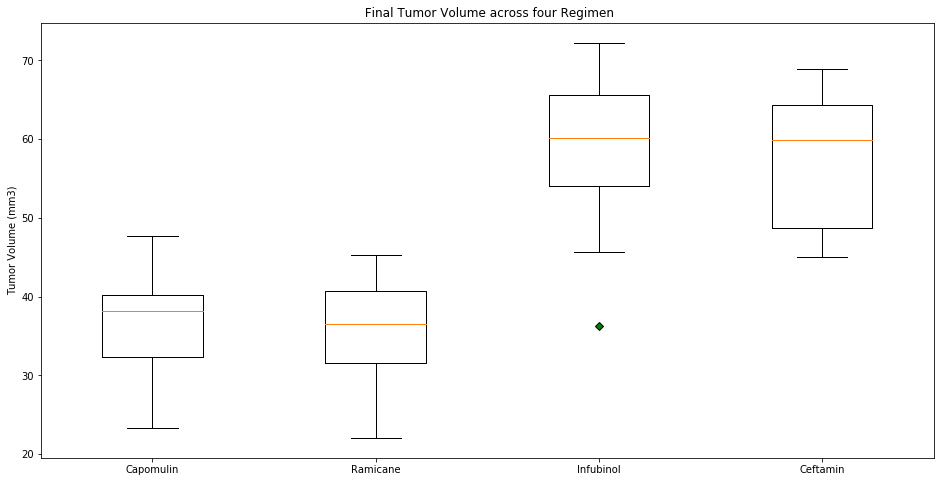

In [44]:
fig, ax = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax.boxplot([capomulin_mouse['Tumor Volume (mm3)'], ramicane_mouse['Tumor Volume (mm3)'], infubinol_mouse['Tumor Volume (mm3)'],  ceftamin_mouse['Tumor Volume (mm3)']],flierprops=green_diamond)
ax.set_title(' Final Tumor Volume across four Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and scatter plots

In [45]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [47]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


In [48]:
mouse_group = combined_data.groupby(['Mouse ID', 'Timepoint'])
mouse_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
mouse_sum = mouse_group['Tumor Volume (mm3)'].sum()
mouse_sum

Mouse ID  Timepoint
a203      0            45.000000
          5            48.508468
          10           51.852437
          15           52.777870
          20           55.173336
                         ...    
z969      25           63.145652
          30           65.841013
          35           69.176246
          40           70.314904
          45           73.867845
Name: Tumor Volume (mm3), Length: 1888, dtype: float64

In [50]:
single_mouse = 's185'
single_mouse_count = mouse_sum.loc[single_mouse]
single_mouse_count

Timepoint
0     45.000000
5     43.878496
10    37.614948
15    38.177232
20    36.866876
25    33.949940
30    32.959671
35    28.328531
40    25.472143
45    23.343598
Name: Tumor Volume (mm3), dtype: float64

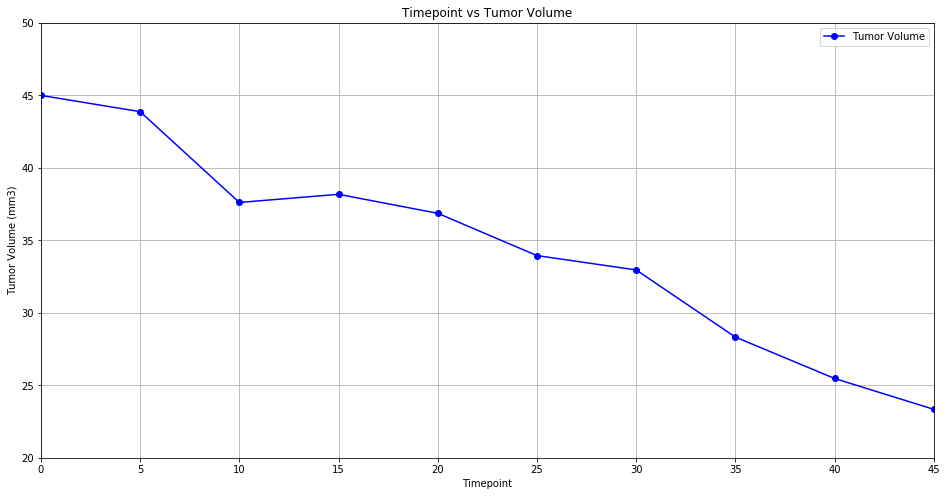

In [51]:
mouse_chart = single_mouse_count.plot(kind='line', figsize=(16,8), color='blue', label='Tumor Volume', marker='o')
mouse_chart.set_ylabel('Tumor Volume (mm3)')
mouse_chart.set_title('Timepoint vs Tumor Volume')
mouse_chart.legend(loc='best')
mouse_chart.set_xlim(0,45)
mouse_chart.set_ylim(20,50)
mouse_chart.grid()

In [52]:
df = combined_data.groupby('Drug Regimen')


In [53]:
df_1 = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
df_1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [54]:
x = df_1['Weight (g)']
y = df_1['Tumor Volume (mm3)']


In [55]:
weight = df_1.groupby('Weight (g)')
weight

In [56]:
ave_tumor_volume = weight['Tumor Volume (mm3)'].mean()
ave_tumor_volume

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [57]:
df_d = pd.DataFrame(ave_tumor_volume)
df_d

,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109


In [58]:
x = df_d.columns
x

Index(['Tumor Volume (mm3)'], dtype='object')

In [59]:
x_value = df_d.index
x_value

Int64Index([15, 17, 19, 20, 21, 22, 23, 24, 25], dtype='int64', name='Weight (g)')

In [60]:
y = df_d['Tumor Volume (mm3)']

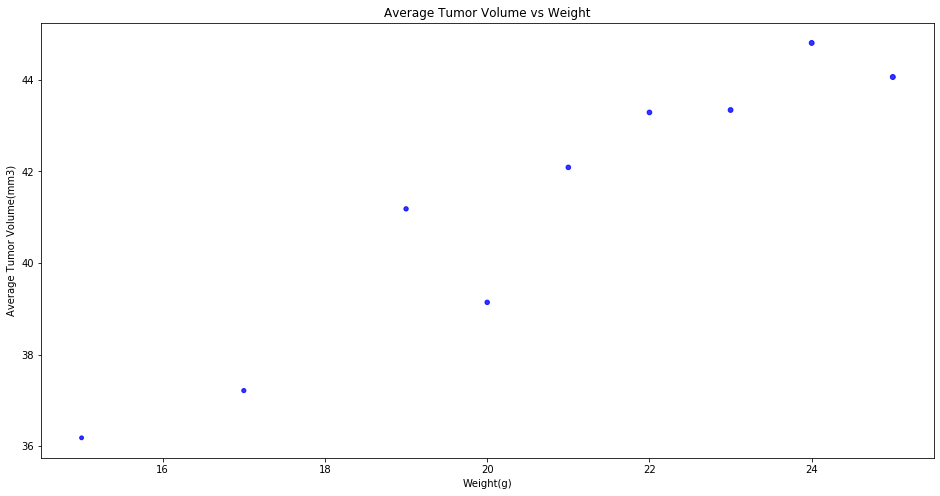

In [61]:
plt.scatter(x_value, y, s=x_value, alpha=0.8, color='blue')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.title('Average Tumor Volume vs Weight')
plt.show()

In [62]:
(slope, intercept, rvalues, pvalues, stderr) = st.linregress(x_value, y)
print(f"Corelation Coefficient : {rvalues}")
print(f"Slope : {slope}")
print(f"Intercept : {intercept}")
print(f"pvalue: {pvalues}")

Corelation Coefficient : 0.950524396185527
Slope : 0.894772609734063
Intercept : 22.764229983591896
pvalue: 8.449451040646223e-05


In [63]:
regress_values = slope * x_value + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

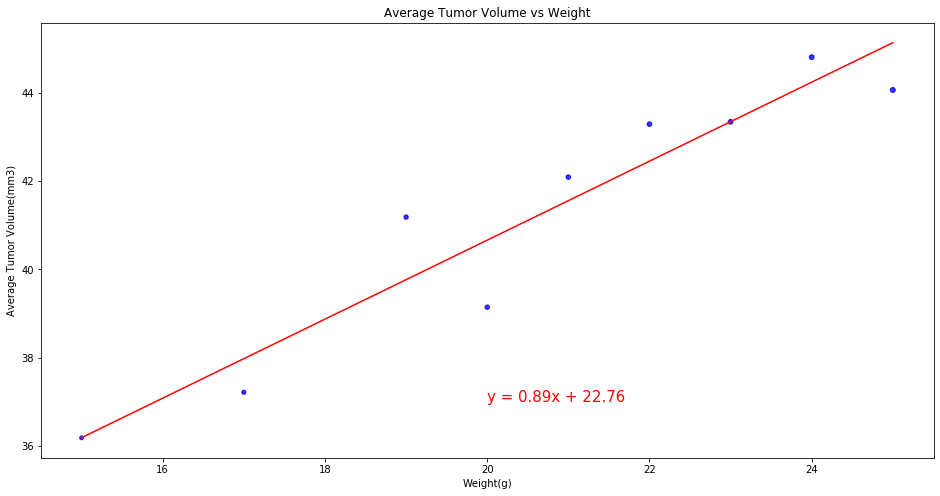

In [64]:
plt.scatter(x_value, y, s=x_value, alpha=0.8, color='blue')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_equ, (20,37), fontsize=15, color='red')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.title('Average Tumor Volume vs Weight')
plt.show()


